### Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tarfile
from glob import glob
import nibabel as nib
import cv2

from sklearn.model_selection import train_test_split


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import Recall, Precision, Accuracy
from tensorflow.keras.optimizers import Adam
from keras import backend as K


from tqdm import tqdm

## Extracting Images From TarFile

In [ ]:
#Defining path
colon_tarfile = "/content/drive/MyDrive/Task10_Colon.tar"
capstone_path = "/content/drive/MyDrive/Capstone4"

In [ ]:
#extracting tarfile
with tarfile.open(colon_tarfile,"r") as tar:
  tar.extractall(path=capstone_path)
  print("Extracted")

Extracted


In [ ]:
obj = tarfile.open(colon_tarfile,"r")

filenames = obj.getnames()

for name in filenames:
  print(name)

obj.close()

./._Task10_Colon
Task10_Colon
Task10_Colon/._labelsTr
Task10_Colon/labelsTr
Task10_Colon/._imagesTr
Task10_Colon/imagesTr
Task10_Colon/._imagesTs
Task10_Colon/imagesTs
Task10_Colon/._dataset.json
Task10_Colon/dataset.json
Task10_Colon/imagesTs/._colon_198.nii.gz
Task10_Colon/imagesTs/colon_198.nii.gz
Task10_Colon/imagesTs/._colon_186.nii.gz
Task10_Colon/imagesTs/colon_186.nii.gz
Task10_Colon/imagesTs/._colon_151.nii.gz
Task10_Colon/imagesTs/colon_151.nii.gz
Task10_Colon/imagesTs/._colon_132.nii.gz
Task10_Colon/imagesTs/colon_132.nii.gz
Task10_Colon/imagesTs/._colon_020.nii.gz
Task10_Colon/imagesTs/colon_020.nii.gz
Task10_Colon/imagesTs/._colon_116.nii.gz
Task10_Colon/imagesTs/colon_116.nii.gz
Task10_Colon/imagesTs/._colon_067.nii.gz
Task10_Colon/imagesTs/colon_067.nii.gz
Task10_Colon/imagesTs/._colon_179.nii.gz
Task10_Colon/imagesTs/colon_179.nii.gz
Task10_Colon/imagesTs/._colon_079.nii.gz
Task10_Colon/imagesTs/colon_079.nii.gz
Task10_Colon/imagesTs/._colon_004.nii.gz
Task10_Colon/imag

## Visualizing Data

In [ ]:
# Defining Image and Label Path
images_path = "/content/drive/MyDrive/Capstone4/Task10_Colon/imagesTr"
labels_path = "/content/drive/MyDrive/Capstone4/Task10_Colon/labelsTr"

In [ ]:
images = glob(images_path + "/*.nii.gz")
labels = glob(labels_path + "/*.nii.gz")

print("We have {} images with {} labels".format(len(images), len(labels)))

We have 126 images with 126 labels


In [ ]:
im = nib.load(images[0]).get_fdata()
im

array([[[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        ...,
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.]],

       [[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        ...,
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.]],

       [[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
        ...,
        [-10

Text(0.5, 1.0, 'LABEL')

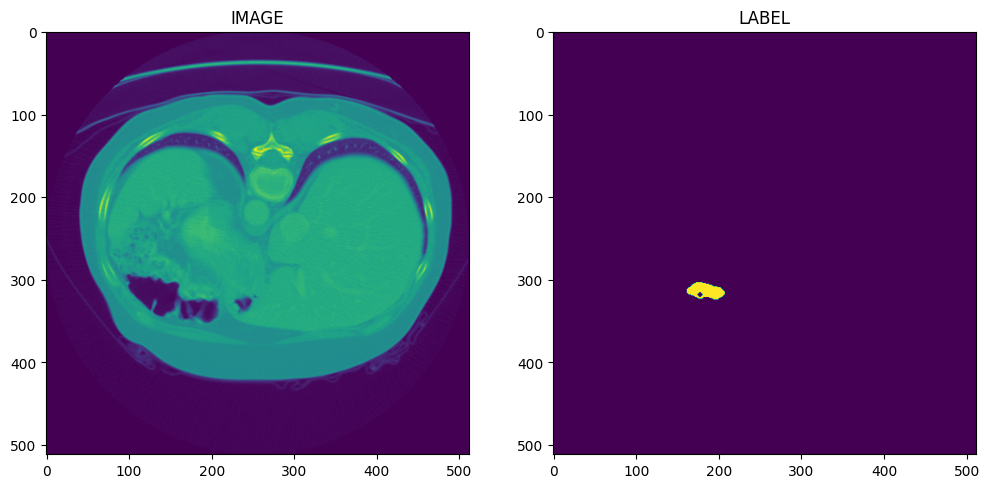

In [ ]:
# visualizing Image with its corresponding mask
temp_img = nib.load(images[0]).get_fdata()
temp_lbl = nib.load(labels[0]).get_fdata()

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6))
ax1.imshow(temp_img[:,:,52].T)
ax1.set_title('IMAGE')
ax2.imshow(temp_lbl[:,:,52].T)
ax2.set_title('LABEL')

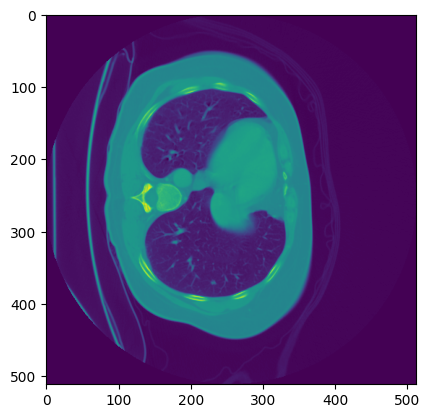

In [ ]:
plt.imshow(np.asanyarray(nib.load(images[2]).dataobj)[:, :, -2])

<ipython-input-14-330e55ba2416>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(i+1,3,1)


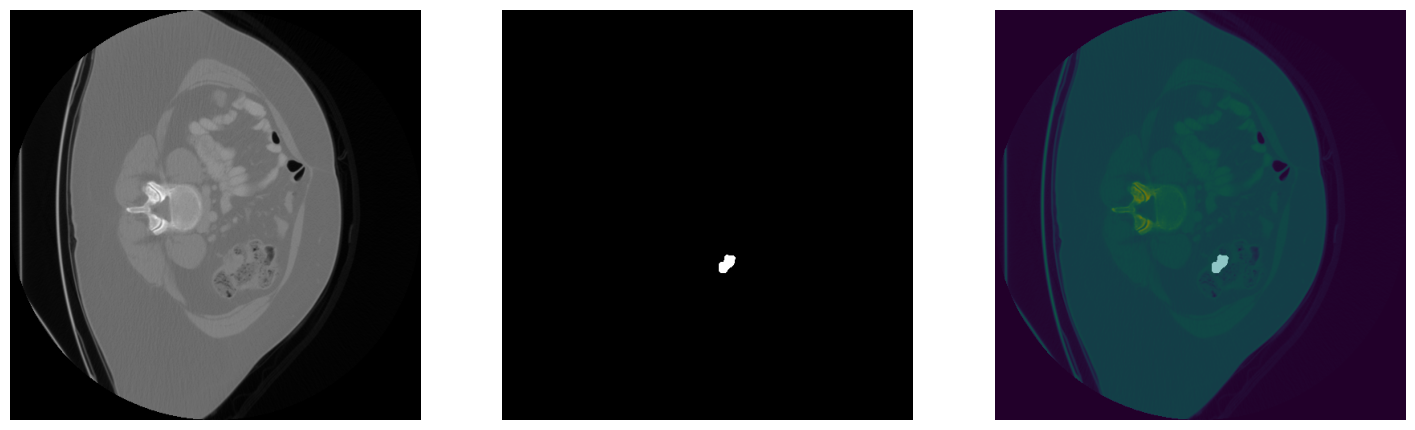

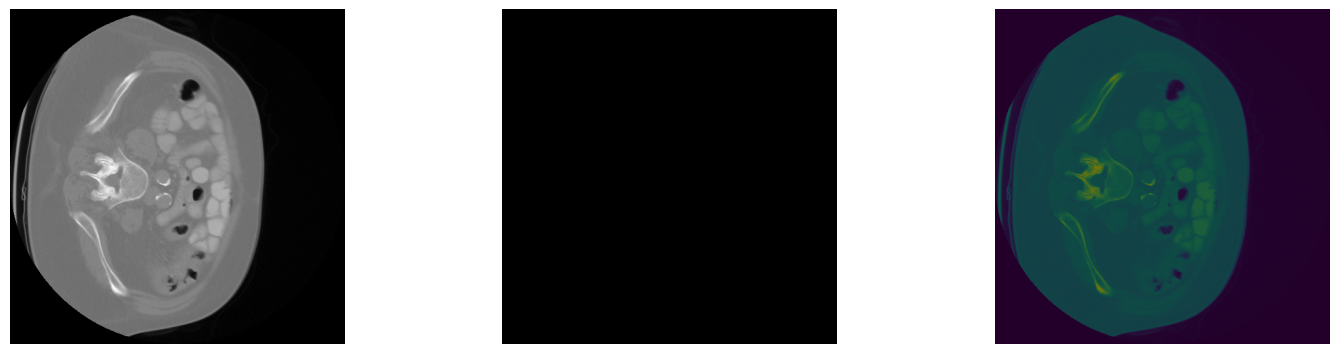

In [ ]:
for i in (2,3):
  img_data = np.asanyarray(nib.load(labels[i]).dataobj)
  label_img = np.asanyarray(nib.load(images[i]).dataobj)
  plt.figure(figsize=(18, 20))
  plt.axis("off")

  plt.subplot(i+1,3,1)
  plt.imshow(label_img[:, :, 42], cmap="gray")
  plt.axis("off")

  plt.subplot(i+1,3,2)
  plt.imshow(img_data[:, :, 42], cmap="gray")
  plt.axis("off")

  plt.subplot(i+1,3,3)
  plt.imshow(label_img[:, :, 42])
  plt.imshow(img_data[:, :, 42], cmap="gray", alpha=0.5)
  plt.axis("off")
  plt.show()

In [ ]:
temp_img.shape

(512, 512, 60)

(-0.5, 511.5, 511.5, -0.5)

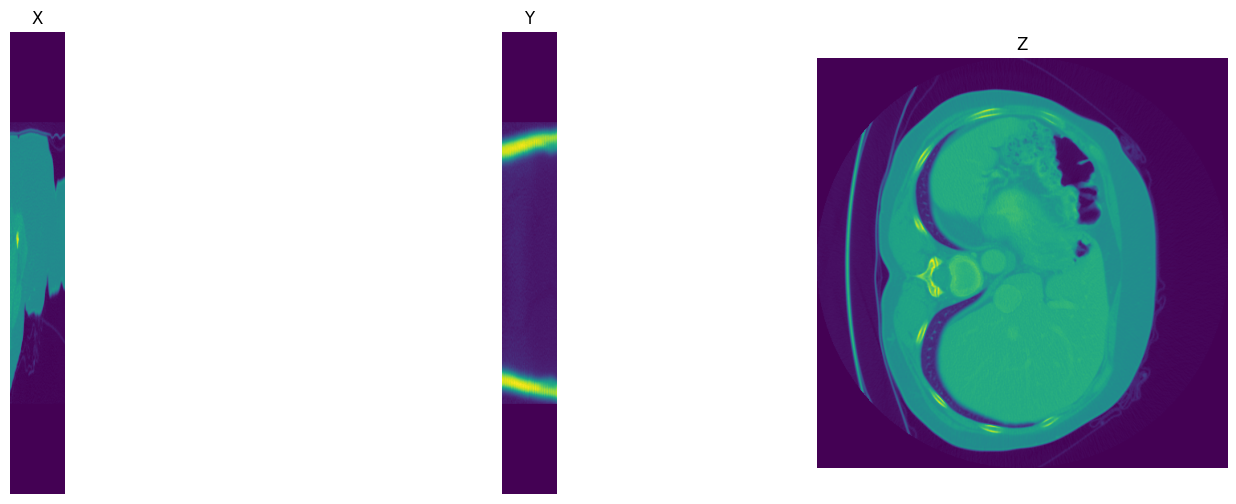

In [ ]:
#visualizing Image in all three direction

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.imshow(temp_img[52,:,:])
plt.title('X')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(temp_img[:,52,: ])
plt.title('Y')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(temp_img[:,:,52])
plt.title('Z')
plt.axis('off')

## PreProcessing And Slicing Of Images

In [ ]:
#checking the max and min value stored in the images

max_val_im = []
min_val_im = []

for image in tqdm(images):
  image_arr = nib.load(image).get_fdata()
  max_val_im.append(np.max(image_arr))
  min_val_im.append(np.min(image_arr))

100%|██████████| 126/126 [02:06<00:00,  1.00s/it]


In [ ]:
#checking the max and min value stored in the labels

max_val_lb = []
min_val_lb = []

for label in tqdm(labels):
  label_arr = nib.load(label).get_fdata()
  max_val_lb.append(np.max(label_arr))
  min_val_lb.append(np.min(label_arr))

100%|██████████| 126/126 [01:13<00:00,  1.71it/s]


In [ ]:
min_img_val = min(min_val_im)
max_img_val = max(max_val_im)

print("Maximum Values in Each Image - ", sorted(max_val_im))
print("\n")
print("Minimum Values in Each Image - ", sorted(min_val_im))
print("\n")
print("Maximum Value in All Images - ", max_img_val)
print("\n")
print("Minimum Value in All Images - ", min_img_val)

Maximum Values in Each Image -  [1141.0, 1163.0, 1214.0, 1271.0, 1281.0, 1298.0, 1314.0, 1360.0, 1369.0, 1381.0, 1388.0, 1404.0, 1405.0, 1405.0, 1414.0, 1418.0, 1419.0, 1432.0, 1434.0, 1437.0, 1439.0, 1443.0, 1444.0, 1446.0, 1447.0, 1448.0, 1469.0, 1470.0, 1476.0, 1484.0, 1489.0, 1492.0, 1493.0, 1503.0, 1503.0, 1507.0, 1517.0, 1518.0, 1522.0, 1529.0, 1537.0, 1544.0, 1547.0, 1549.0, 1551.0, 1551.0, 1554.0, 1557.0, 1560.0, 1564.0, 1569.0, 1580.0, 1582.0, 1584.0, 1592.0, 1592.0, 1595.0, 1602.0, 1629.0, 1635.0, 1640.0, 1644.0, 1654.0, 1656.0, 1662.0, 1666.0, 1671.0, 1676.0, 1677.0, 1705.0, 1707.0, 1725.0, 1745.0, 1821.0, 1877.0, 1902.0, 1953.0, 2079.0, 2156.0, 2171.0, 2328.0, 2540.0, 2618.0, 2814.0, 2937.0, 2954.0, 2976.0, 2976.0, 3017.0, 3047.0, 3070.0, 3071.0, 3071.0, 3071.0, 3071.0, 3071.0, 3071.0, 3071.0, 3071.0, 3071.0, 3071.0, 3071.0, 3071.0, 3071.0, 3071.0, 3071.0, 3071.0, 3071.0, 3071.0, 3071.0, 3071.0, 3071.0, 3071.0, 3071.0, 3071.0, 3071.0, 3071.0, 3071.0, 3071.0, 3071.0, 3071.0,

In [ ]:
min_label_val = min(min_val_lb)
max_label_val = max(max_val_lb)

print("Maximum Values in Each Label - ", max_val_lb)
print("\n")
print("Minimum Values in Each Label - ", min_val_lb)
print("\n")
print("Maximum Value in All Labels - ", max_label_val)
print("\n")
print("Minimum Value in All Labels - ", min_label_val)

Maximum Values in Each Label -  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Minimum Values in Each Label -  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [ ]:
""" Hounsfield Values - this is a standardized value which quantify the xray penetration through various material in the body.
                        Generally, this value ranges from -1024 to 3071 """



HOUNSFIELD_MIN = -1024
HOUNSFIELD_MAX = 3071
HOUNSFIELD_RANGE = HOUNSFIELD_MAX - HOUNSFIELD_MIN

In [ ]:
def normalize(img):
  """
  Function to normalize the images.
  Before normalizing we will deal with outliers which are values greater than 3071 and smaller than -1024

  """

  img[img < HOUNSFIELD_MIN] = HOUNSFIELD_MIN
  img[img > HOUNSFIELD_MAX] = HOUNSFIELD_MAX
  return (img - HOUNSFIELD_MIN) / HOUNSFIELD_RANGE

In [ ]:
normalized_temp_img = normalize(temp_img)
print(np.min(normalized_temp_img))
print(np.max(normalized_temp_img))
print(normalized_temp_img.shape)
print(type(normalized_temp_img))

0.0
1.0
(512, 512, 137)
<class 'numpy.ndarray'>


In [ ]:
def readImage(file_path, normalized=False):
  """
  Function to read the image from file
  """

  img = nib.load(file_path).get_fdata()
  if normalized:
    return normalize(img)
  return img

In [ ]:
def saveSlices(image, filename, path, category):
  """
  This function takes a 2D slice and save it in a folder as .png image
  """


  img = np.uint8(image * 255)
  outfile = os.path.join(path, f'{filename}.png')
  cv2.imwrite(outfile, img)
  print(f'[x] Slice saved: {outfile}', end='\r')

In [ ]:
def sliceAndSaveImages(img3D, filename, path, category):
  """
  Driver function to slice and save the images
  """
  
  (x,y,z) = img3D.shape
  print(x,y,z)
  slice_count = 0
  slice_count += z
  for i in range(z):
    saveSlices(img3D[:,:,i], filename+f'_slice{str(i).zfill(3)}', path, category)
  return slice_count

In [ ]:
#defining path for slices
imageSlicesFolderPath = "/content/drive/MyDrive/Capstone4/ImageSlices"
labelSlicesFolderPath = "/content/drive/MyDrive/Capstone4/LabelSlices"

In [ ]:
#slicing images
for index, filename in enumerate(images):
  image = readImage(filename, True)
  imagename = filename.split("/")[-1]
  fname = imagename.split(".")[0]
  numSlices = sliceAndSaveImages(image, fname, imageSlicesFolderPath, "img")
  print(f'\n{filename}, {numSlices} Slices Created \n')

512 512 137
[x] Slice saved: /content/drive/MyDrive/Capstone4/ImageSlices/colon_219_slice136.png
/content/drive/MyDrive/Capstone4/Task10_Colon/imagesTr/colon_219.nii.gz, 137 Slices Created 

512 512 84
[x] Slice saved: /content/drive/MyDrive/Capstone4/ImageSlices/colon_207_slice083.png
/content/drive/MyDrive/Capstone4/Task10_Colon/imagesTr/colon_207.nii.gz, 84 Slices Created 

512 512 92
[x] Slice saved: /content/drive/MyDrive/Capstone4/ImageSlices/colon_215_slice091.png
/content/drive/MyDrive/Capstone4/Task10_Colon/imagesTr/colon_215.nii.gz, 92 Slices Created 

512 512 103
[x] Slice saved: /content/drive/MyDrive/Capstone4/ImageSlices/colon_194_slice102.png
/content/drive/MyDrive/Capstone4/Task10_Colon/imagesTr/colon_194.nii.gz, 103 Slices Created 

512 512 110
[x] Slice saved: /content/drive/MyDrive/Capstone4/ImageSlices/colon_098_slice109.png
/content/drive/MyDrive/Capstone4/Task10_Colon/imagesTr/colon_098.nii.gz, 110 Slices Created 

512 512 101
[x] Slice saved: /content/drive/MyDri

In [ ]:
#slicing labels
for index, filename in enumerate(labels):
  image = readImage(filename, False)
  imagename = filename.split("/")[-1]
  fname = imagename.split(".")[0]
  numSlices = sliceAndSaveImages(image, fname, labelSlicesFolderPath, "lbl")
  print(f'\n{filename}, {numSlices} Slices Created \n')

512 512 137
[x] Slice saved: /content/drive/MyDrive/Capstone4/LabelSlices/colon_219_slice136.png
/content/drive/MyDrive/Capstone4/Task10_Colon/labelsTr/colon_219.nii.gz, 137 Slices Created 

512 512 84
[x] Slice saved: /content/drive/MyDrive/Capstone4/LabelSlices/colon_207_slice083.png
/content/drive/MyDrive/Capstone4/Task10_Colon/labelsTr/colon_207.nii.gz, 84 Slices Created 

512 512 92
[x] Slice saved: /content/drive/MyDrive/Capstone4/LabelSlices/colon_215_slice091.png
/content/drive/MyDrive/Capstone4/Task10_Colon/labelsTr/colon_215.nii.gz, 92 Slices Created 

512 512 103
[x] Slice saved: /content/drive/MyDrive/Capstone4/LabelSlices/colon_194_slice102.png
/content/drive/MyDrive/Capstone4/Task10_Colon/labelsTr/colon_194.nii.gz, 103 Slices Created 

512 512 110
[x] Slice saved: /content/drive/MyDrive/Capstone4/LabelSlices/colon_098_slice109.png
/content/drive/MyDrive/Capstone4/Task10_Colon/labelsTr/colon_098.nii.gz, 110 Slices Created 

512 512 101
[x] Slice saved: /content/drive/MyDri

In [ ]:
#saving the path of images and labels

image_slices = []
label_slices = []

for filename in os.listdir("/content/drive/MyDrive/Capstone4/ImageSlices"):
  image_slices.append(os.path.join(imageSlicesFolderPath, filename))

for filename in os.listdir("/content/drive/MyDrive/Capstone4/LabelSlices"):
  label_slices.append(os.path.join(labelSlicesFolderPath, filename))

In [ ]:
print(len(image_slices), len(label_slices))

13486 13486


In [ ]:
#We will create a database from the above paths
ImageLabelSLicesDataset = pd.DataFrame({'Image Slices':image_slices, 'Label Slices':label_slices})
ImageLabelSLicesDataset.head()

,Image Slices,Label Slices
0,/content/drive/MyDrive/Capstone4/ImageSlices/c...,/content/drive/MyDrive/Capstone4/LabelSlices/c...
1,/content/drive/MyDrive/Capstone4/ImageSlices/c...,/content/drive/MyDrive/Capstone4/LabelSlices/c...
2,/content/drive/MyDrive/Capstone4/ImageSlices/c...,/content/drive/MyDrive/Capstone4/LabelSlices/c...
3,/content/drive/MyDrive/Capstone4/ImageSlices/c...,/content/drive/MyDrive/Capstone4/LabelSlices/c...
4,/content/drive/MyDrive/Capstone4/ImageSlices/c...,/content/drive/MyDrive/Capstone4/LabelSlices/c...


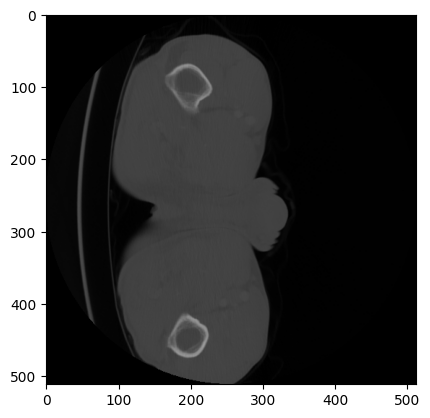

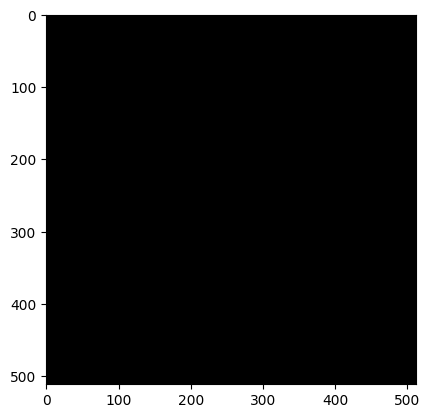

In [ ]:
test_img = cv2.imread(ImageLabelSLicesDataset["Image Slices"][0])
plt.imshow(test_img)
plt.show()

test_lbl = cv2.imread(ImageLabelSLicesDataset["Label Slices"][0])
plt.imshow(test_lbl)

In [ ]:
#Saving the dataset as .csv file
ImageLabelSLicesDataset.to_csv("ImageLabelDS.csv")